# ErSE 394 — Geo-Environmental Modeling & Analysis
## Assignment Block 4 (Assessing Changes in Water Volume in Wadi Murwani Reservoir Using Sentinel-2)

### Link to the repository: [https://github.com/Sara-Iftikhar/geo_env](https://github.com/Sara-Iftikhar/geo_env)

#### 5. Where are the NDVI values highest and why?
NDVI values are highest on the upper, lower and back side of the reservoir because of
the presence of the temperate and tropical rainforests.

#### 6. Where are the NDWI values highest and why?
The NDWI serves as an index to quantify the presence of water bodies, reaching its peak values within the boundaries of reservoirs, indicating the clear presence of water.

#### 7. To analyze the dynamics of the reservoir’s water volume, create a time series of the NDWI.

In [1]:
import os
path = os.path.join(os.getcwd(), 'data', 'Sentinel-2')
if not os.path.exists(path):
      os.mkdir(path)

#### 8. Create a figure of the time series.

In [2]:
import pandas as pd

df = pd.read_csv(os.path.join(path, 'Sentinel-2 L2A-7-NDWI-2019-01-01T00_00_00.000Z-2024-01-01T23_59_59.999Z.csv'))

In [3]:
df

,C0/date,C0/min,C0/max,C0/mean,C0/stDev,C0/sampleCount,C0/noDataCount,C0/median,C0/p10,C0/p90,C0/cloudCoveragePercent
0,2019-01-02T00:00:00.000Z,-0.045091,0.279383,0.064645,0.072750,2772,1523,0.029372,0.005520,0.194444,78.302642
1,2019-01-07T00:00:00.000Z,-0.059342,0.166230,0.113961,0.041574,2772,1523,0.126356,0.063778,0.148553,100.000000
2,2019-01-12T00:00:00.000Z,-0.355470,0.859903,0.673966,0.232758,2772,1523,0.751163,0.376176,0.819059,0.000000
3,2019-01-17T00:00:00.000Z,-0.448665,1.000000,0.871434,0.315602,2772,1523,0.996497,0.411301,1.000000,0.560448
4,2019-01-22T00:00:00.000Z,-0.309663,0.645472,0.497338,0.174857,2772,1523,0.551942,0.264957,0.608534,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
353,2023-12-07T00:00:00.000Z,-0.478445,1.000000,0.864268,0.301329,2772,1523,0.963049,0.697974,1.000000,0.000000
354,2023-12-12T00:00:00.000Z,-0.307303,0.733956,0.238658,0.210997,2772,1523,0.260110,-0.016786,0.493270,53.162530
355,2023-12-22T00:00:00.000Z,-0.450000,1.000000,0.506351,0.222111,2772,1523,0.560510,0.354108,0.659051,0.000000
356,2023-12-27T00:00:00.000Z,-0.449114,0.491857,0.153462,0.119456,2772,1523,0.181460,0.086069,0.231121,0.000000


In [4]:
path = os.path.join(os.getcwd(), 'figures')
if not os.path.exists(path):
      os.mkdir(path)

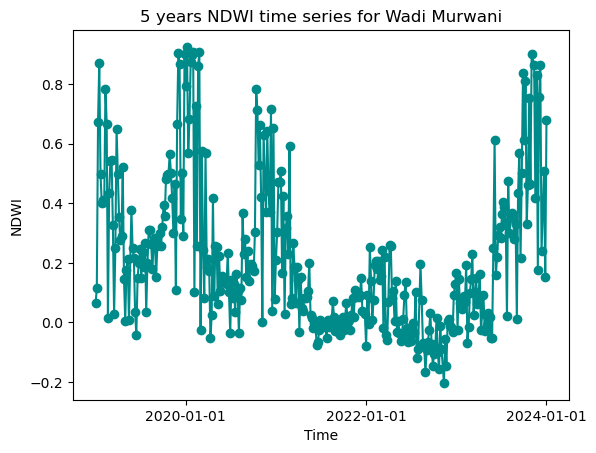

In [5]:
from easy_mpl import plot
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

NDWI_series = pd.Series(df['C0/mean'].values, index=pd.to_datetime(df['C0/date']))
ax = plot(NDWI_series, '-o', color='darkcyan', show=False,
           ax_kws=dict(
                        xlabel="Time",
                        ylabel="NDWI",
                        title='5 years NDWI time series for Wadi Murwani'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.savefig(os.path.join(path, '5_years_NDWI_time_series_Wadi_Murwani'), dpi=300)

#### 9. Adjust the maximum permissible cloud cover per scene to minimize cloud interference in the NDWI imagery. Does cloud cover typically result in higher or lower NDWI values?

#### 10. Does the presence of vegetation result in a negative or positive NDWI value? Why?
NDWI is a metric index used to map water bodies. It uses green and near infrared bands to 
identify water bodies as they strongly absorb light in visible to infrared electromagnetic spectrum.
Presence of vegetation at an area results in negative values of NDWI. 

#### 11. What were the periods when the reservoir’s water volume was at its lowest and highest?

In [6]:
print(f'Lowest reservoir’s water volume period: {NDWI_series.idxmin()}')
print(f'Highest reservoir’s water volume period: {NDWI_series.idxmax()}')

Lowest reservoir’s water volume period: 2022-11-12 00:00:00+00:00
Highest reservoir’s water volume period: 2020-01-07 00:00:00+00:00
